In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler 
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
wine = datasets.load_wine()
df_wine = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df_wine['class'] = wine.target

In [3]:
df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


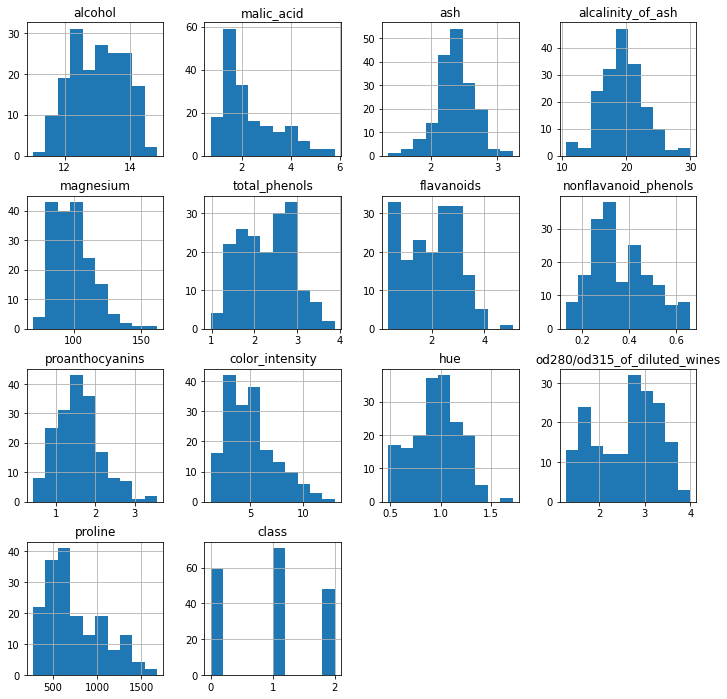

In [4]:
df_wine.hist(figsize=(12,12))
plt.show()

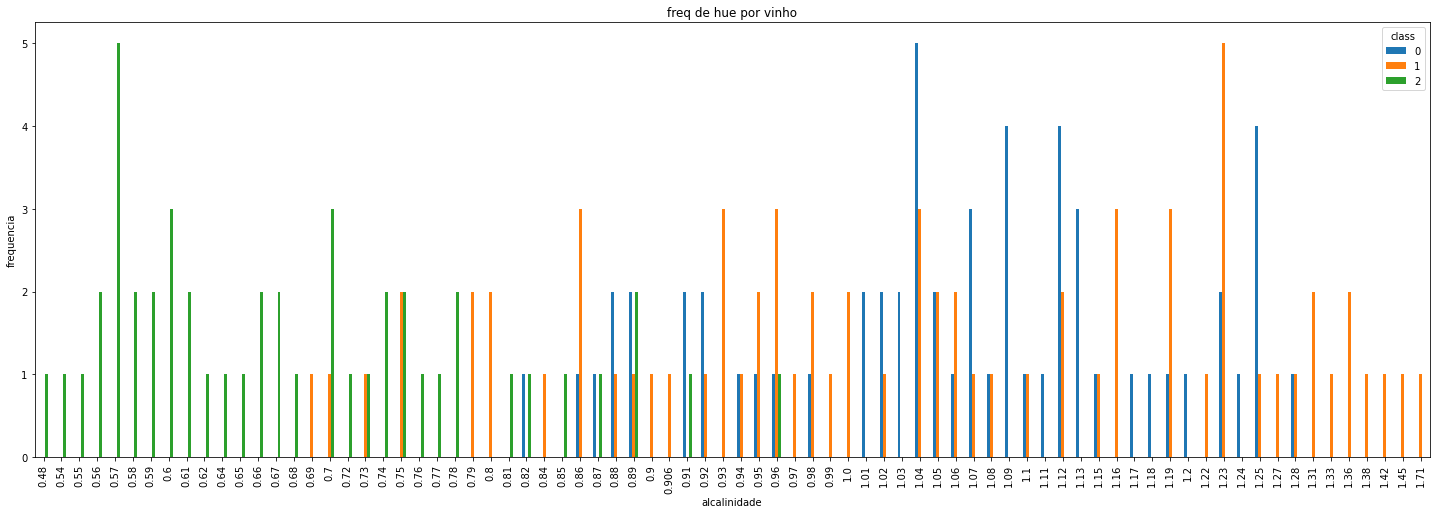

In [5]:
pd.crosstab(df_wine['hue'], df_wine['class']).plot(kind='bar', figsize=(25,8))
plt.title('freq de hue por vinho')
plt.xlabel('alcalinidade')
plt.ylabel('frequencia')
plt.show()

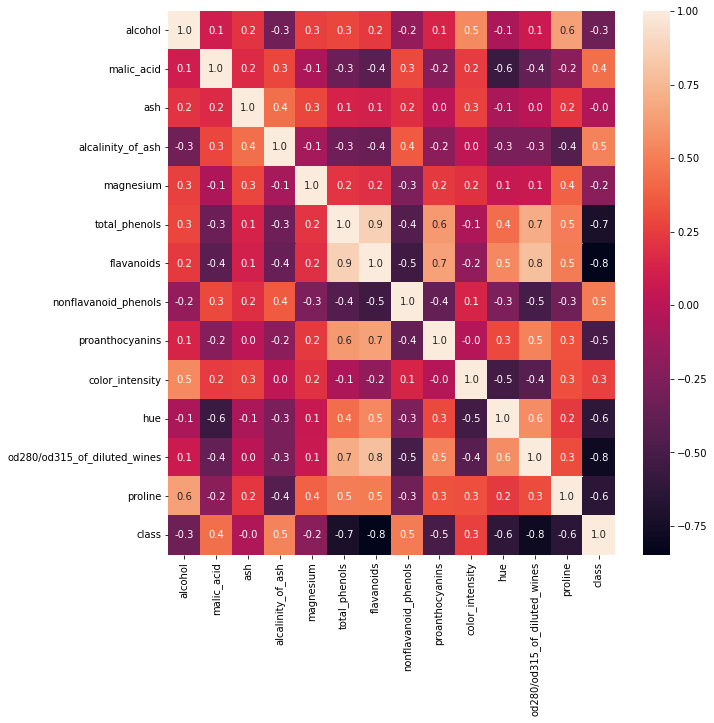

In [6]:
plt.figure(figsize=(10,10))
sns.heatmap(df_wine.corr(),annot=True, fmt='.1f')
plt.show()

In [7]:
X = np.array(df_wine.drop(columns=['class'], axis=1))
y = np.array(df_wine[['class']])

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size=0.2)

In [9]:
scale = MinMaxScaler(feature_range = (0,1))
X_train = scale.fit_transform(X_train)
x_test = scale.fit_transform(X_test)

In [10]:
model = Sequential()
model.add(Dense(16,
                input_shape=(13,),
                activation='relu'))
model.add(Dropout(0.15))
model.add(Dense(8,
                activation='relu',
                kernel_initializer='normal'))
model.add(Dense(3,
                activation='softmax'))

In [11]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])


In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 387
Trainable params: 387
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=20,
    restore_best_weights=True,
    mode = 'max'
)

In [18]:
%%time
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    batch_size=10,
                    epochs=100,
                    callbacks=early_stopping,
                    verbose=1)

Epoch 1/100
15/15 [==============================] - 0s 7ms/step - loss: 0.9961 - accuracy: 0.3169 - val_loss: 1.0556 - val_accuracy: 0.2222
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9961 - accuracy: 0.4225 - val_loss: 1.0556 - val_accuracy: 0.2222
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9961 - accuracy: 0.3732 - val_loss: 1.0555 - val_accuracy: 0.2222
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.9961 - accuracy: 0.3662 - val_loss: 1.0555 - val_accuracy: 0.2222
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.9961 - accuracy: 0.3028 - val_loss: 1.0555 - val_accuracy: 0.2222
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9961 - accuracy: 0.2958 - val_loss: 1.0555 - val_accuracy: 0.2222
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.9961 - accuracy: 0.3451 - val_loss: 1.0555 - val_accuracy: 0.2222
Epoch 8/100
1